In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [1]:
import matplotlib
# matplotlib.use('TkAgg')  # Use the TkAgg backend (or another appropriate one)
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import pandas as pd
from hugalaxy.hugalaxy import GalaxyWrapper, calculate_density_parameters, move_rotation_curve
from hugalaxy.plotting import plotRotationCurve
from hugalaxy.calibration import calibrate_density_coefficients
from timeit import default_timer as timer

####################################################
# MODELING M33 GALAXY
####################################################

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

print(np.shape(m33_rotational_curve))

M33_Distance = 3.2E6
Radius_Universe_4D = 14.01E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 320
# NZ should always be ODD
nz = 101
ntheta = 180
R_max = 50000.0

rho_0, alpha_0, rho_1, alpha_1, h0 = calculate_density_parameters(redshift)
GalaxyMass = 5E10
# Create The Galaxy
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, ntheta, redshift,GPU_ID=0, cuda=True, taskflow=True)
M33.density_wrapper_internal()
M33.read_galaxy_rotation_curve(m33_rotational_curve)
# tic = time.perf_counter()
# [fitting_coeffs, df] = calibrate_density_coefficients(m33_rotational_curve, redshift,M33, 20)
# toc = time.perf_counter()
# print(f"Calibrated Galaxy Evolution in {toc - tic:0.4f} seconds")


(21, 2)


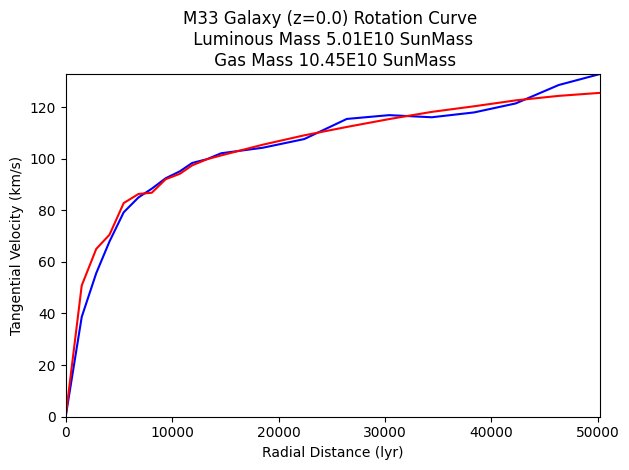

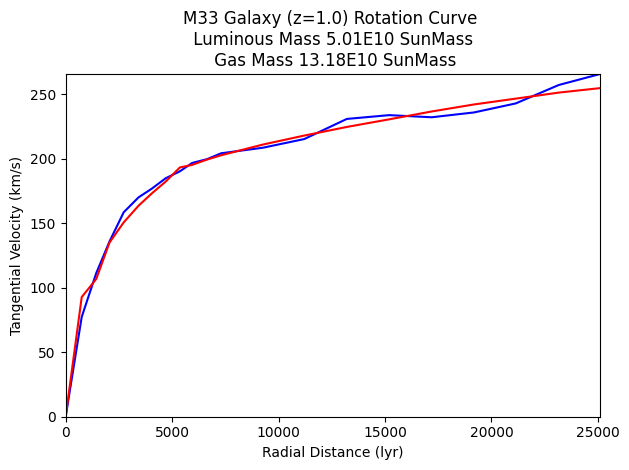

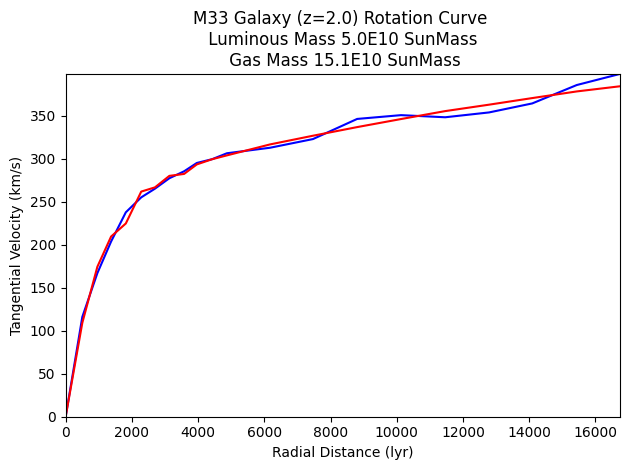

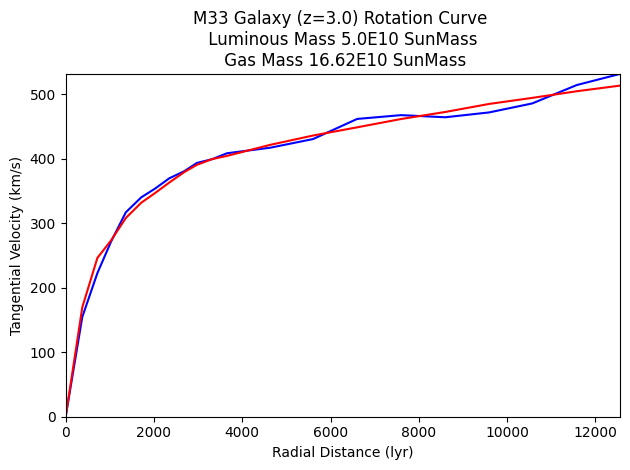

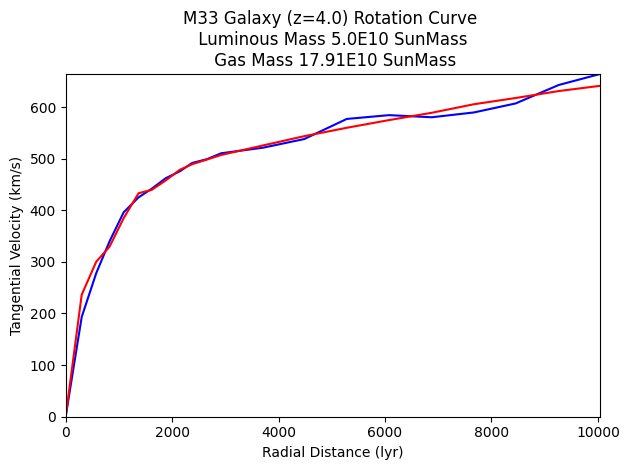

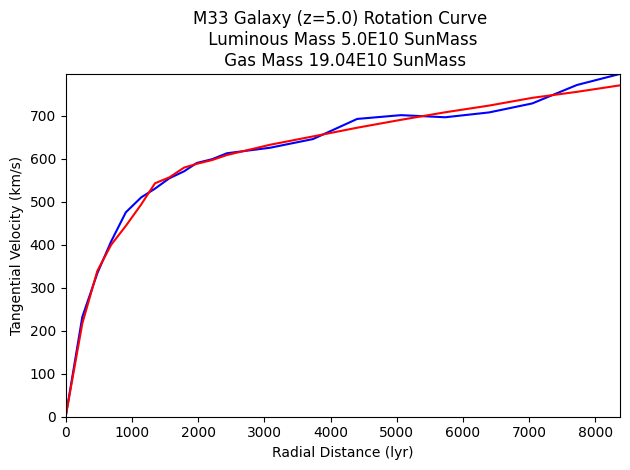

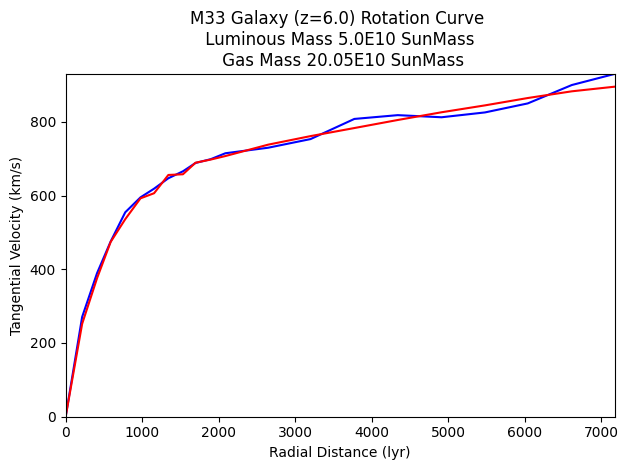

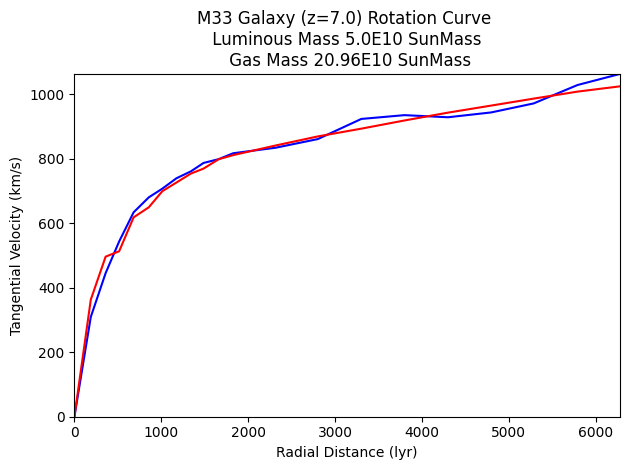

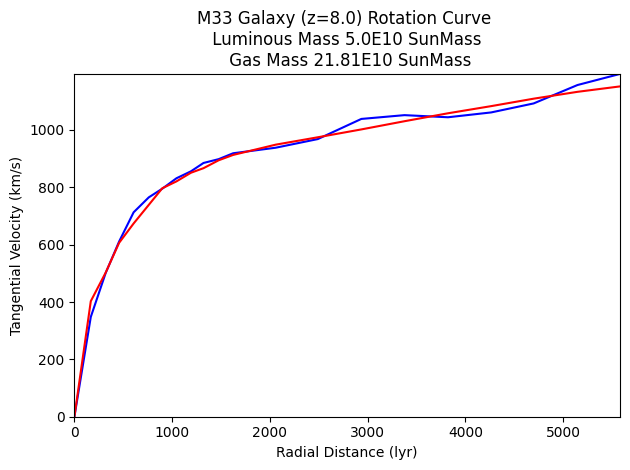

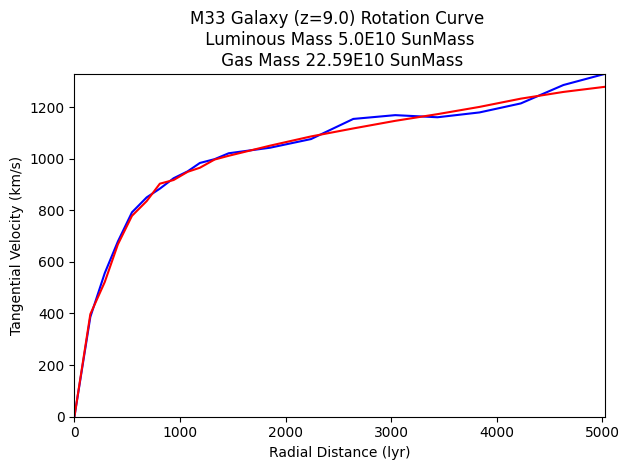

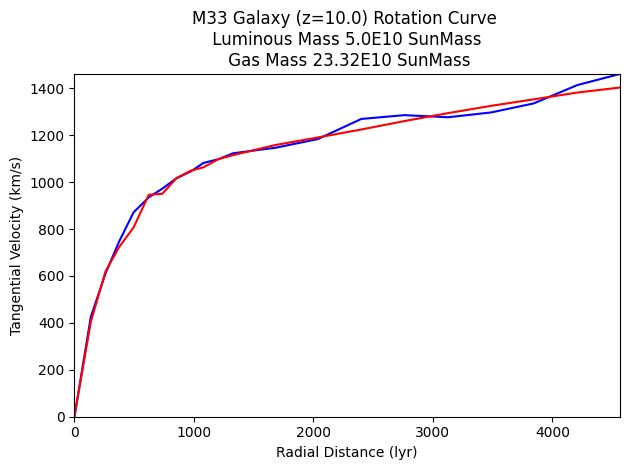

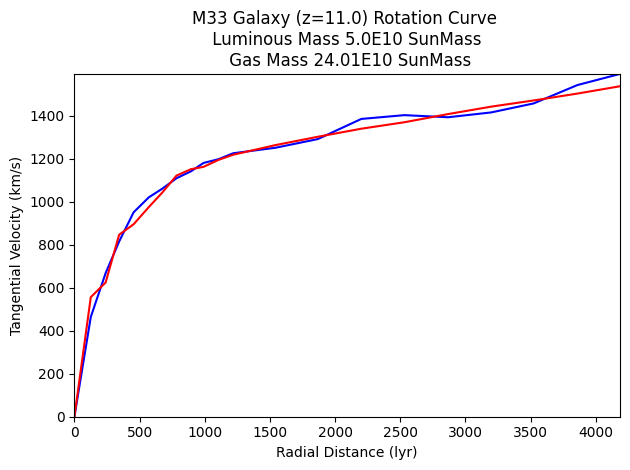

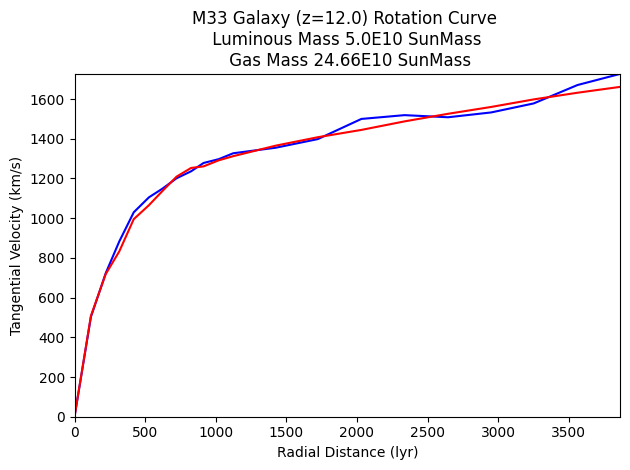

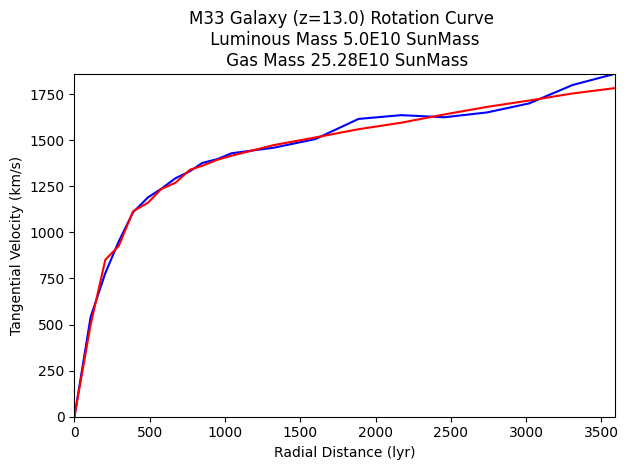

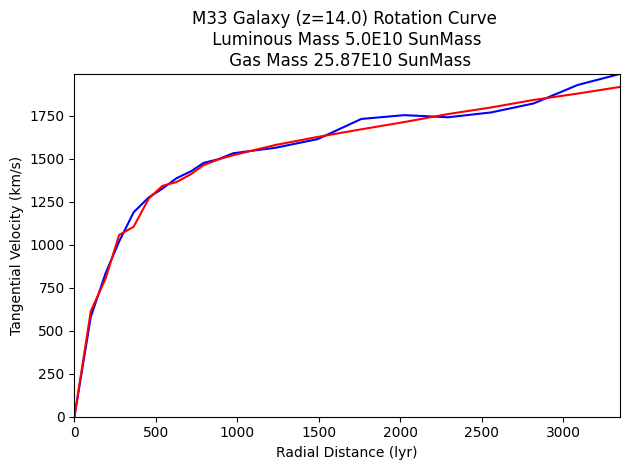

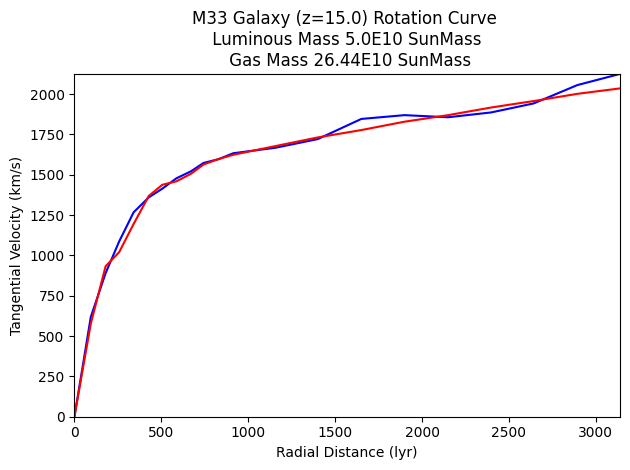

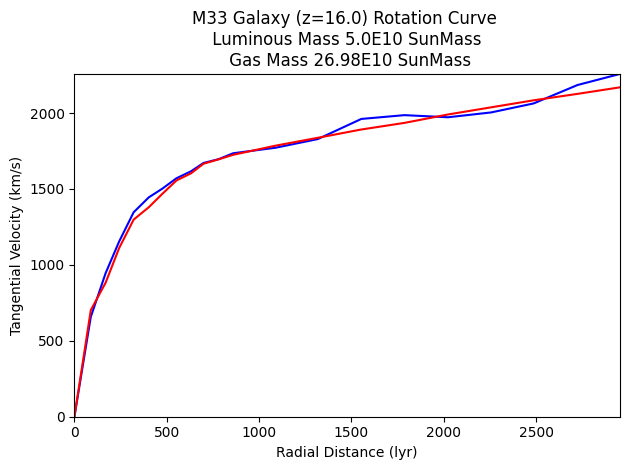

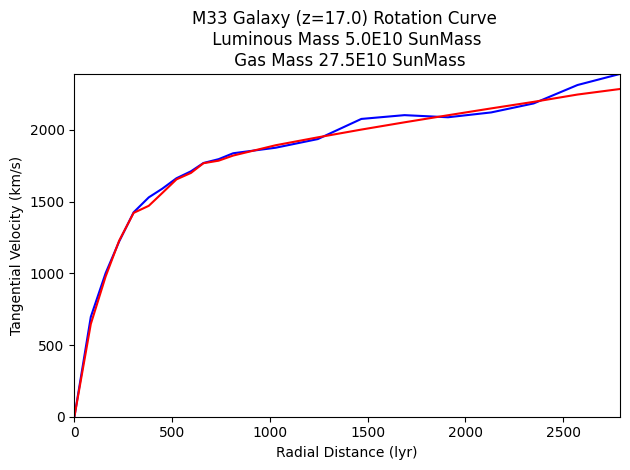

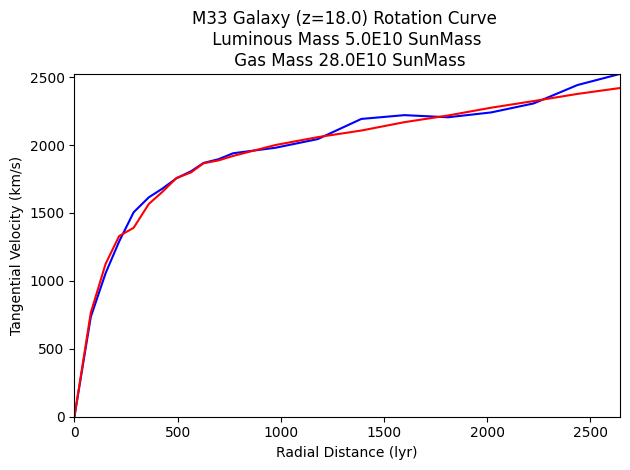

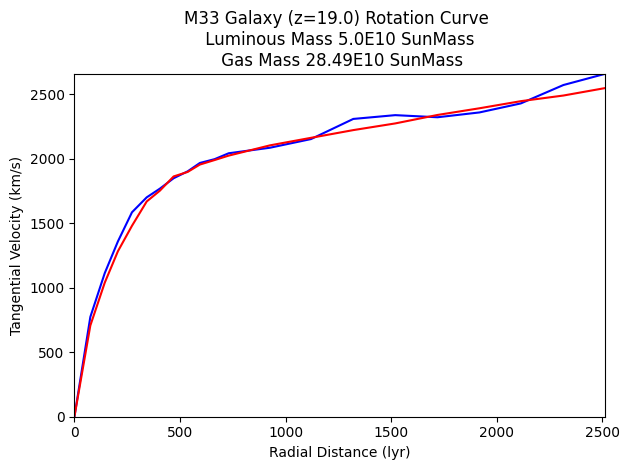

In [2]:
for redshift_birth in np.arange(20):
    r4d = 14/(1+redshift_birth)
    M33.redshift=redshift_birth
    new_rotation_curve = move_rotation_curve(m33_rotational_curve, redshift, redshift_birth )
    M33.read_galaxy_rotation_curve(new_rotation_curve)
    M33.move_galaxy_redshift(redshift_birth)
    M33.calculate_rotational_velocity(M33.rho,0.0)
    filenames = plotRotationCurve(M33,redshift_birth=redshift_birth)
  


In [3]:
# import pandas as pd
# import numpy as np

# def calibrate_density_coefficients(m33_rotational_curve, redshift, M33, range_):
#     Radius_4D = 14.01
#     data = M33.calibrate_df(m33_rotational_curve, redshift, range_)
#     df = pd.DataFrame(data, columns=["rho_0","alpha_0", "rho_1", "alpha_1", "h0", "M0", "M1", "redshift_birth"])
#     r4d = 1/(1+df.redshift_birth)
#     df["r4d"]=r4d
#     df = df.astype(np.double)
#     # Assuming you have the DataFrame df with the required columns

#     # Calculate log(r4d) column
#     df['log_r4d'] = np.log10(1 / (1 + df['redshift_birth']))

#     # Define the degree of the polynomial fit
#     degree = 1

#     # Create an empty dictionary to store the fitting coefficients
#     fitting_coeffs = {}

#     # Loop over the columns to calculate the fitting coefficients
#     for column in ['rho_0', 'alpha_0', 'rho_1', 'alpha_1', 'h0']:
#         # Calculate log(column) column
#         df['log_' + column] = np.log10(df[column])

#         # Perform the polynomial fit using numpy.polyfit
#         fit_coeffs = np.polyfit(df['log_r4d'], df['log_' + column], degree)

#         # Store the fitting coefficients in the dictionary
#         fitting_coeffs[column] = fit_coeffs

#     # Print the fitting coefficients
#     for column, coeffs in fitting_coeffs.items():
#         print('pow(r4d, {}) * {},'.format(coeffs[0],pow(10,coeffs[1])))
#     return fitting_coeffs, df

In [4]:
# [fitting_coeffs, df] = calibrate_density_coefficients(m33_rotational_curve, redshift,M33, 20)
# toc = time.perf_counter()
# print(f"Calibrated Galaxy Evolution in {toc - tic:0.4f} seconds")